# 4_Detection_Color_Example_2

### Librerias

In [168]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Función que muestra los detalles de la imagen. 

In [169]:
# Función para mostrar información básica sobre una imagen, incluyendo su tamaño, valor máximo y valor mínimo de píxeles.
# (Antigua función)
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

In [170]:
# Función para mostrar una imagen utilizando la biblioteca matplotlib.
def plot_show_image(imagen):
    imageRGB = imagen[:,:,[2,1,0]] 
    plt.imshow(imageRGB)
    plt.show()

In [171]:
# Función para calcular y mostrar el histograma de una imagen en escala de grises utilizando OpenCV y Matplotlib.
def cv_hist(img):
    histograma = cv.calcHist([img], [0], None, [256], [0,256])
    plt.figure(figsize=(8, 6))
    plt.plot(histograma, color='black')
    plt.title('Histograma de la imagen en escala de grises')
    plt.xlabel('Intensidad de píxeles')
    plt.ylabel('Frecuencia')
    plt.show()

In [172]:
# Función para aplicar una operación de dilatación a una imagen utilizando un kernel de tamaño definido.
def dilatar_imagen(imagen,tamaño):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (tamaño, tamaño))  # Define el kernel de dilatación
    img_dilatada = cv.dilate(imagen, kernel)
    return img_dilatada
    

In [102]:
# Función para aplicar una operación de erosión a una imagen utilizando un kernel de tamaño definido.
def ero_imagen(imagen,tamaño):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (tamaño, tamaño))  # Define el kernel de erosión
    img_erodida = cv.erode(imagen, kernel)
    return img_erodida

In [180]:
# Función para calcular y mostrar el histograma de una imagen dada en escala de grises.
# (Antigua función)
def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()

## Leer Imagen a color

In [174]:
Icv = cv.imread("icosDriverMotor.jpeg")
howis(Icv)

size =  (1600, 738, 3)
max  =  255
min  =  0


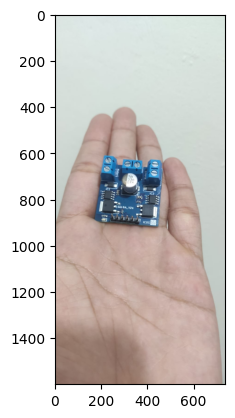

In [175]:
# Convertimos la imagen de BGR a RGB reordenando los canales.
plot_show_image(Icv)

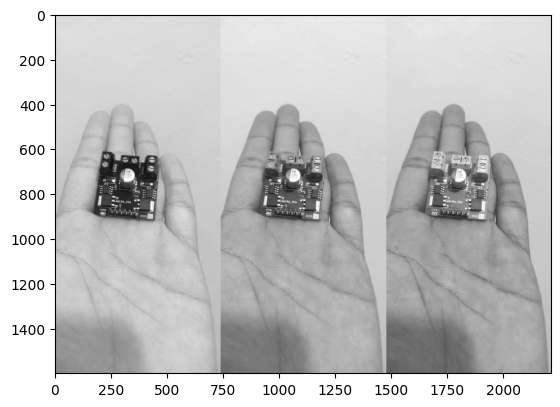

In [176]:
# Convierte una imagen de formato BGR a RGB, extrae los canales de color R, G y B, 
# y luego concatena los canales para formar una imagen RGB. Finalmente, muestra la imagen.
I = Icv[:,:,[2,1,0]]
R = I[:,:,0]
G = I[:,:,1]
B = I[:,:,2]
RGB = np.concatenate((R,G,B),axis=1)
plt.imshow(RGB,cmap='gray')
plt.show()

### Convertimos a blanco y negro

size =  (1600, 738)
max  =  255
min  =  23


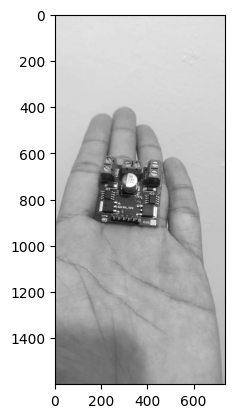

In [177]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
# weighted average
k  = (1/3,1/3,1/3)
Zd = k[0]*Rd+k[1]*Gd+k[2]*Bd
Z  = Zd.astype(int)
howis(Z)
plt.imshow(Z,cmap='gray')
plt.show()

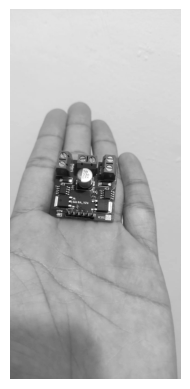

In [178]:
imagen_gris = cv.cvtColor(Icv, cv.COLOR_BGR2GRAY)
plt.imshow(imagen_gris, cmap='gray')
plt.axis('off')
plt.show()

### Comparar dos histogramas de imágenes utilizando un enfoque de bucle "for" y la biblioteca OpenCV.

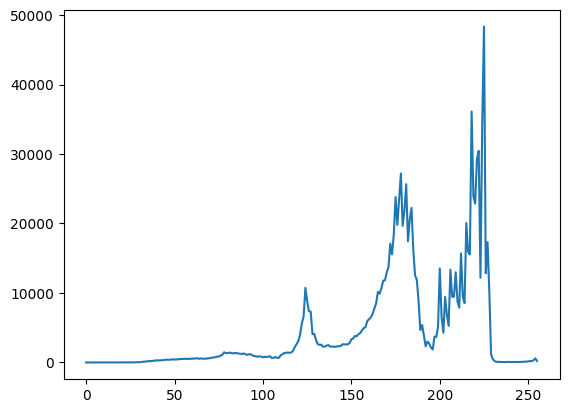

In [181]:
imhist(Z)

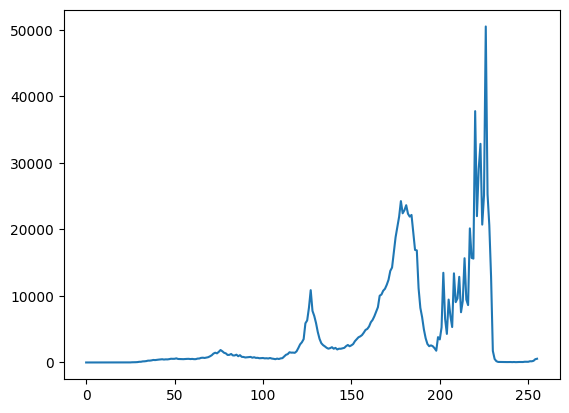

In [184]:
imhist(imagen_gris)

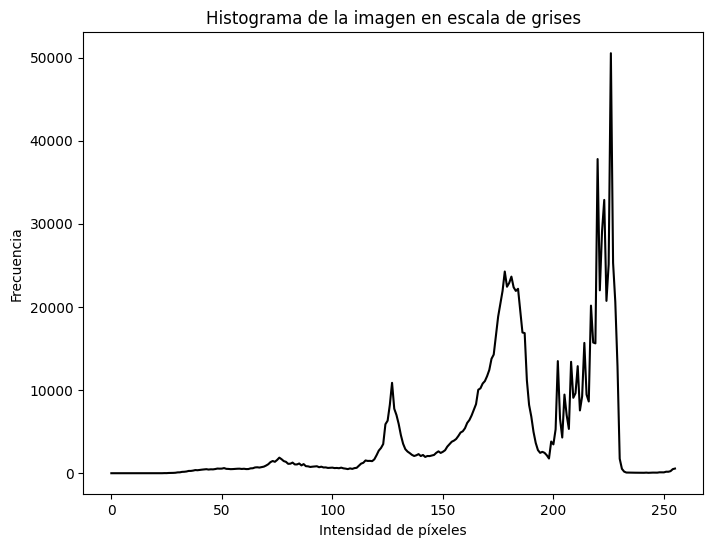

In [185]:
cv_hist(imagen_gris)

### Segmentación de una nueva imagen utilizando la fórmula antigua.

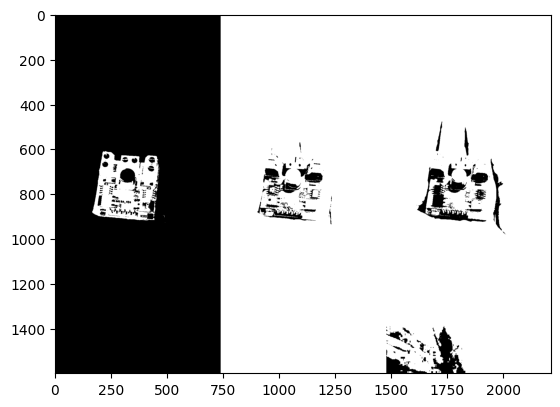

In [186]:
# Creación de máscaras individuales para los canales de color R, G y B, basadas en umbrales específicos,
# y luego se concatenan horizontalmente para formar una imagen binaria compuesta. Finalmente, se muestra la imagen binaria.
Sr = R<90
Sg = G>75
Sb = B>105
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
plt.imshow(Srgb,cmap='gray')
plt.show()

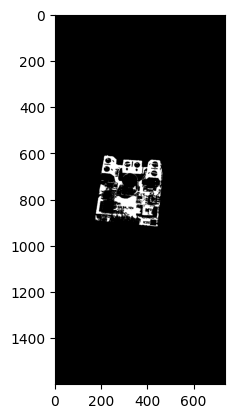

In [188]:
# Se realiza una operación de 'AND' lógico entre las máscaras individuales para los canales de color R, G y B,
# y luego se aplica nuevamente una operación 'AND' lógico entre los resultados de las combinaciones anteriores.
# Finalmente, se muestra la imagen binaria resultante, escalada para valores de 0 a 255.
Srg = np.logical_and(Sr,Sg)
S   = np.logical_and(Srg,Sb)
plt.imshow(S*255,cmap='gray')
plt.show()

### Segmentación utilizando la nueva fórmula utilizando OpenCV.

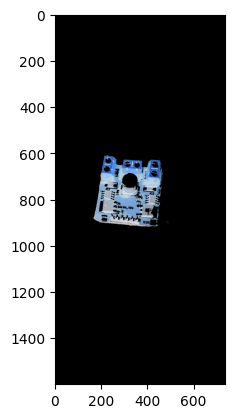

In [189]:
# Definir el rango de azul en BGR
rango_bajo_azul = np.array([0, 0,0])  # Valor mínimo de B,G,R para el azul
rango_alto_azul = np.array([255, 170, 88])  # Valor máximo de B,G,R para el azul

# Crear una máscara de los píxeles que están en el rango de azul
mascara_azul = cv.inRange(Icv, rango_bajo_azul, rango_alto_azul)

# Aplicar la máscara a la imagen original
objeto_azul = cv.bitwise_and(Icv, Icv, mask=mascara_azul)

plt.imshow(objeto_azul*255,cmap='gray')
plt.show()

### Searching (imin,jmin) and (imax,jmax) in the segmented region

In [190]:
(N,M) = S.shape
imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if S[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

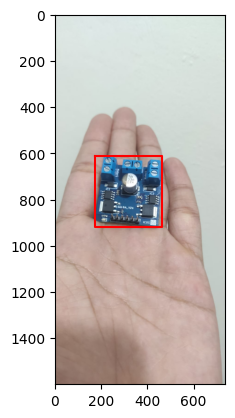

In [191]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y,color = 'red')
plt.show()


### Este código detecta contornos grandes en una imagen y dibuja rectángulos alrededor de ellos. (remplazo del anterior)

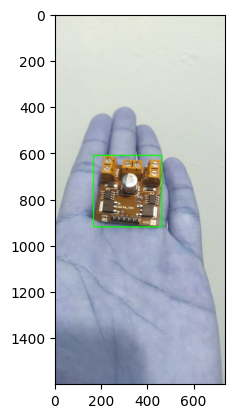

In [19]:
img = Icv.copy()
contornos, _ = cv.findContours(mascara_azul, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Define un umbral de área para lo que consideras "grande"
umbral_area = 150 

# Filtra solo los contornos grandes
contornos_grandes = [contorno for contorno in contornos if cv.contourArea(contorno) > umbral_area]

# Dibuja un rectángulo alrededor de cada contorno grande
for contorno in contornos_grandes:
    x, y, w, h = cv.boundingRect(contorno)
    cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)  

plt.imshow(img, cmap='gray')
plt.show()

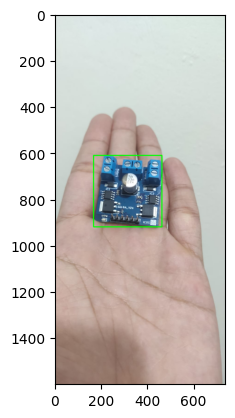

In [192]:
# Convertimos la imagen de BGR a RGB reordenando los canales.
plot_show_image(img)

# Explorando otra imagen para identificar áreas de color azul.

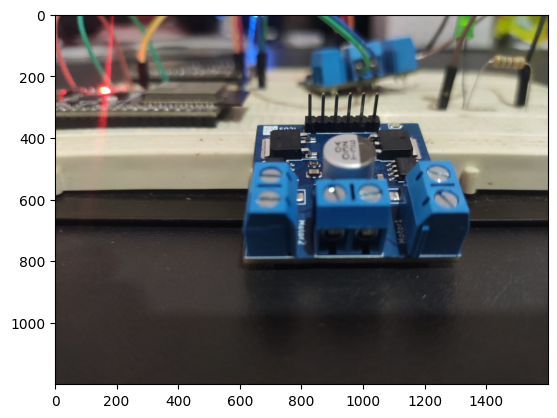

In [193]:
new_Img = cv.imread("icosDriverMotor2.jpeg")
plot_show_image(new_Img)

### Nuevo método, Detecta y muestra áreas en la imagen que están dentro del rango de color azul especificado.

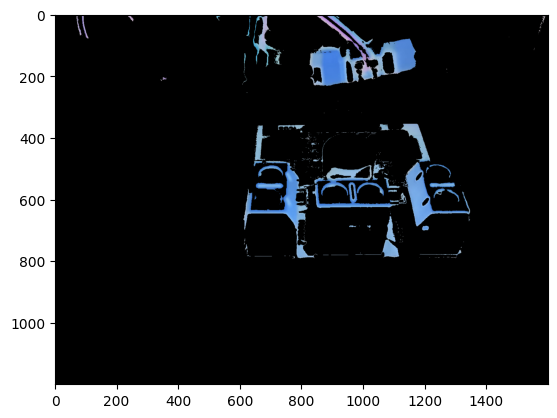

In [195]:
# Seleccionar el rango de color azul en el espacio BGR mediante ajuste manual.
rango_bajo_azul2 = np.array([50,65,0])  # Valor mínimo de B,G,R para el azul
rango_alto_azul2 = np.array([200, 135, 60])  # Valor máximo de B,G,R para el azul

# Crear una máscara de los píxeles que están en el rango de azul
mascara_azul2 = cv.inRange(new_Img, rango_bajo_azul2, rango_alto_azul2)

# Aplicar la máscara a la imagen original
objeto_azul = cv.bitwise_and(new_Img, new_Img, mask=mascara_azul2)

plt.imshow(objeto_azul*255,cmap='gray')
plt.show()

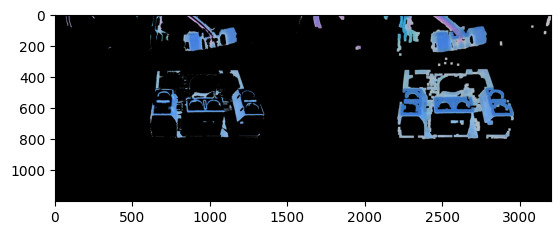

In [196]:
#Usamos dilatación para expandir y conectar regiones de interés, mejorando la detección y el análisis de características en la imagen.
img_dilatada=dilatar_imagen(objeto_azul,15)
img_juntas = np.concatenate((objeto_azul,img_dilatada),axis=1)

plt.imshow(img_juntas*255,cmap='gray')
plt.show()

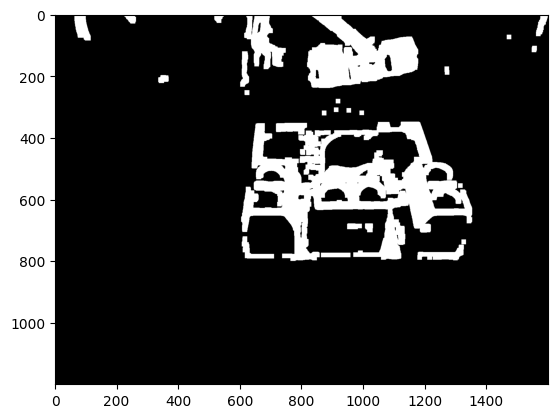

In [197]:
# Convertimos la imagen dilatada a escala de grises y aplicamos un umbral para obtener una máscara binaria, que resalta las áreas de interés en la imagen original.
gris_img = cv.cvtColor(img_dilatada, cv.COLOR_BGR2GRAY)
_, mascara = cv.threshold(gris_img, 0, 255, cv.THRESH_BINARY)
plt.imshow(mascara,cmap='gray')
plt.show()

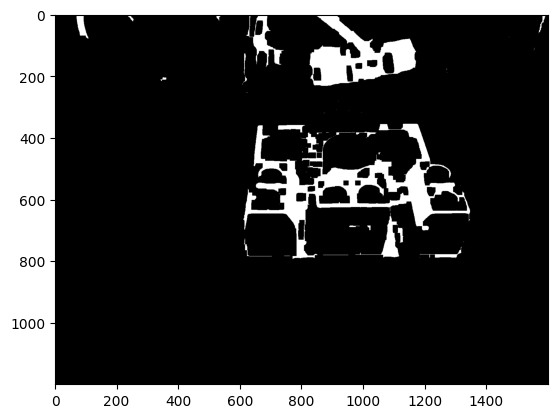

In [198]:
new_mask = ero_imagen(mascara,15)
plt.imshow(new_mask,cmap='gray')
plt.show()

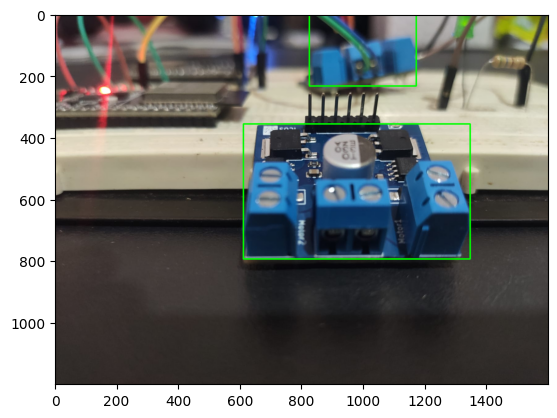

In [200]:
#El código crea una copia de una imagen, encuentra los contornos en una máscara específica y filtra aquellos que tienen un área mayor que un umbral predefinido. 
#Luego, dibuja rectángulos alrededor de los contornos grandes encontrados en la imagen copiada y muestra la imagen resultante.

img2 = new_Img.copy()
contornos2, _ = cv.findContours(new_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Define un umbral de área para lo que consideras "grande"
umbral_area = 10000  

# Filtra solo los contornos grandes
contornos_grandes = [contorno for contorno in contornos2 if cv.contourArea(contorno) > umbral_area]

# Dibuja un rectángulo alrededor de cada contorno grande
for contorno in contornos_grandes:
    x, y, w, h = cv.boundingRect(contorno)
    cv.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 4)  

plot_show_image(img2)
